#Problem Statement

Unemployement is measured by the unemployement rate which is the number of people who are unemployed as a percentage of the total labour force when we have seen a sharp increase in the unemployement rate during Covid-19,So analyzing the unemployment rate.

#1. Import Library

In [49]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import  plotly.express as px

#2. Data Gathering

In [2]:
df=pd.read_excel("/content/Unemployment_Rate_upto_11_2020.xlsx")

In [3]:
df.head()

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Region.1,Longitude,Latitude
0,Andhra Pradesh,31-01-2020,M,5.48,16635535,41.02,South,15.9129,79.74
1,Andhra Pradesh,29-02-2020,M,5.83,16545652,40.90,South,15.9129,79.74
2,Andhra Pradesh,31-03-2020,M,5.79,15881197,39.18,South,15.9129,79.74
3,Andhra Pradesh,30-04-2020,M,20.51,11336911,33.10,South,15.9129,79.74
4,Andhra Pradesh,31-05-2020,M,17.43,12988845,36.46,South,15.9129,79.74


In [59]:
df.tail()

,States,Date,Frequency,Estimated Unemployment Rate,Estimated Employed,Estimated Labour Participation Rate,Region,Longitude,Latitude
262,West Bengal,2020-06-30,M,7.29,30726310,40.39,East,22.9868,87.855
263,West Bengal,2020-07-31,M,6.83,35372506,46.17,East,22.9868,87.855
264,West Bengal,2020-08-31,M,14.87,33298644,47.48,East,22.9868,87.855
265,West Bengal,2020-09-30,M,9.35,35707239,47.73,East,22.9868,87.855
266,West Bengal,2020-10-31,M,9.98,33962549,45.63,East,22.9868,87.855


#3. Basic Information about Dataset

In [4]:

df.shape

(267, 9)

In [5]:
df.columns

Index(['Region', 'Date', 'Frequency', 'Estimated Unemployment Rate (%)',
       'Estimated Employed', 'Estimated Labour Participation Rate (%)',
       'Region.1', 'Longitude', 'Latitude'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 267 entries, 0 to 266
Data columns (total 9 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Region                                   267 non-null    object 
 1   Date                                     267 non-null    object 
 2   Frequency                                267 non-null    object 
 3   Estimated Unemployment Rate (%)          267 non-null    float64
 4   Estimated Employed                       267 non-null    int64  
 5   Estimated Labour Participation Rate (%)  267 non-null    float64
 6   Region.1                                 267 non-null    object 
 7   Longitude                                267 non-null    float64
 8   Latitude                                 267 non-null    float64
dtypes: float64(4), int64(1), object(4)
memory usage: 18.9+ KB


In [7]:
df.describe()

,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Longitude,Latitude
count,267.000000,2.670000e+02,267.000000,267.000000,267.000000
mean,12.236929,1.396211e+07,41.681573,22.826048,80.532425
std,10.803283,1.336632e+07,7.845419,6.270731,5.831738
min,0.500000,1.175420e+05,16.770000,10.850500,71.192400
25%,4.845000,2.838930e+06,37.265000,18.112400,76.085600
50%,9.650000,9.732417e+06,40.390000,23.610200,79.019300
75%,16.755000,2.187869e+07,44.055000,27.278400,85.279900
max,75.850000,5.943376e+07,69.690000,33.778200,92.937600


In [9]:
#check missing/null value
df.isnull().sum()

,0
Region,0
Date,0
Frequency,0
Estimated Unemployment Rate (%),0
Estimated Employed,0
Estimated Labour Participation Rate (%),0
Region.1,0
Longitude,0
Latitude,0


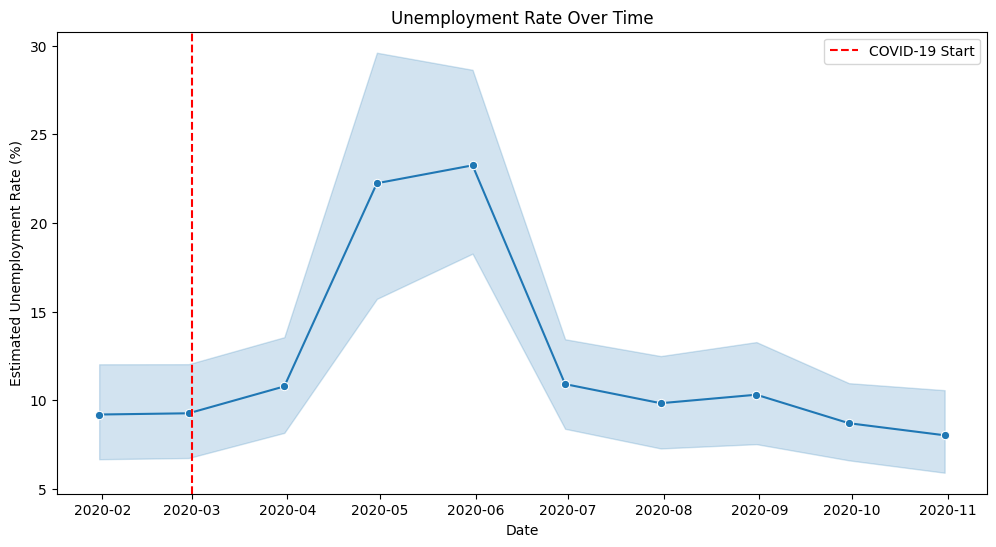

In [40]:
# Plot the unemployment rate over time
plt.figure(figsize=(12, 6))
sns.lineplot(x=df['Date'],y=df['Estimated Unemployment Rate (%)'], marker='o')
plt.title('Unemployment Rate Over Time')
plt.axvline(pd.to_datetime('2020-03-01'), color='r', linestyle='--', label='COVID-19 Start')
plt.legend()
plt.show()

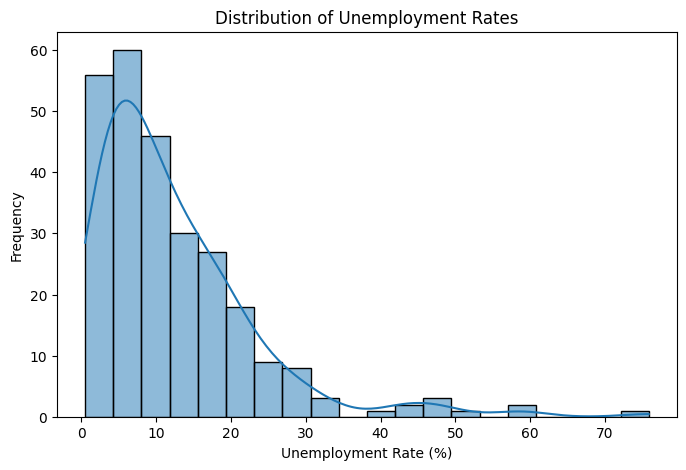

In [43]:
# Distribution of unemployment rates
plt.figure(figsize=(8, 5))
sns.histplot(df['Estimated Unemployment Rate (%)'], bins=20, kde=True)
plt.title('Distribution of Unemployment Rates')
plt.xlabel('Unemployment Rate (%)')
plt.ylabel('Frequency')
plt.show()

<Axes: >

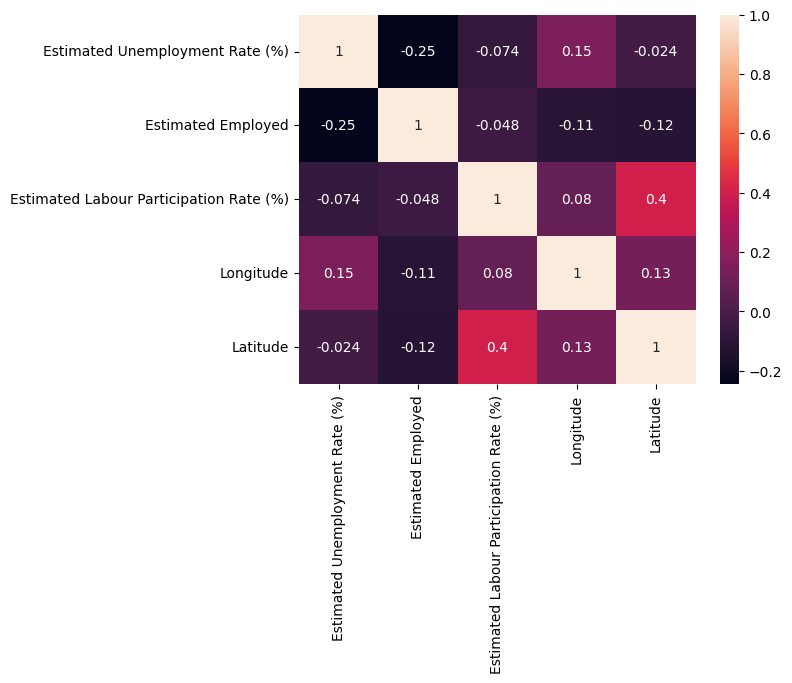

In [51]:
#correlation matrix
sns.heatmap(df.corr(numeric_only=True),annot=True)

#Estimated no of employee according to different region of india


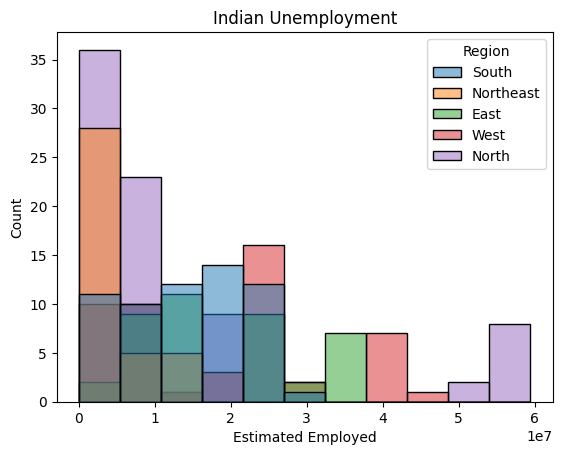

In [54]:

# plotting histplot

df.columns=['States','Date','Frequency','Estimated Unemployment Rate',
                'Estimated Employed','Estimated Labour Participation Rate',
                'Region','Longitude','Latitude']
plt.title('Indian Unemployment')
sns.histplot(x='Estimated Employed',hue='Region',data=df)
plt.show()

#Unemployment rate according to different regions of india


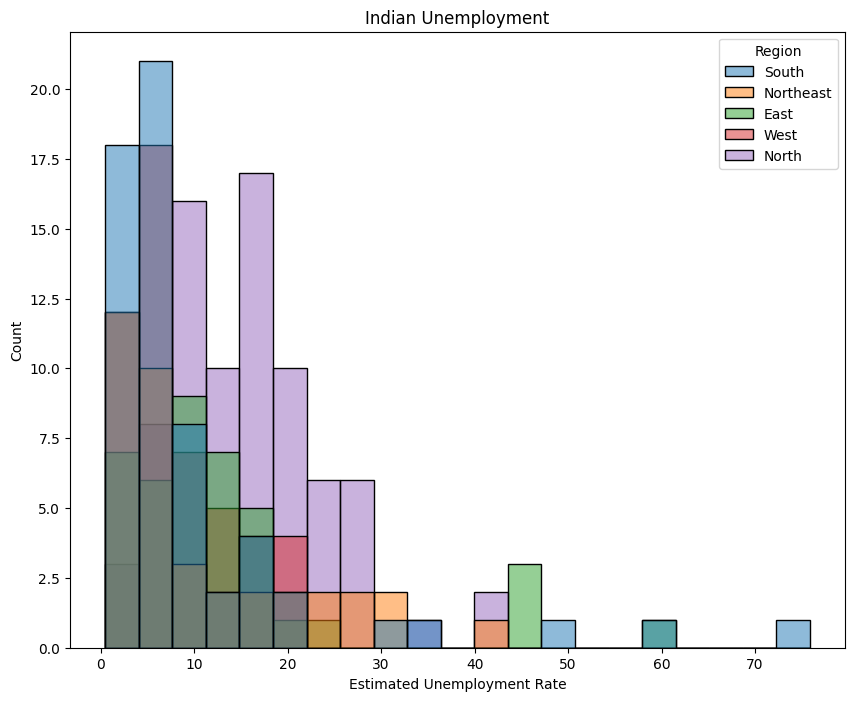

In [56]:
# plotting histplot

plt.figure(figsize=(10,8))
plt.title("Indian Unemployment")
sns.histplot(x="Estimated Unemployment Rate",hue='Region',data=df)
plt.show()


## Dashboard to analyze the unemployment rate of each Indian state


In [58]:
# plotting sunburst

unemployment = df[['States','Region','Estimated Unemployment Rate']]
figure = px.sunburst(unemployment,path=['Region','States'],
                     values='Estimated Unemployment Rate',
                     width=700,height=600, color_continuous_scale='RdY1Gn',
                     title="Unemployment Rate in India")
figure.show()